# problem Statement

Given data of stock market daily price of one share

Do prediction on close values

In [19]:
import pandas as pd
df = pd.read_csv("HistoricalQuotes.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    253 non-null    object 
 1   close   253 non-null    float64
 2   volume  253 non-null    object 
 3   open    253 non-null    float64
 4   high    253 non-null    float64
 5   low     253 non-null    float64
dtypes: float64(4), object(2)
memory usage: 12.0+ KB


In [21]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    253 non-null    datetime64[ns]
 1   close   253 non-null    float64       
 2   volume  253 non-null    object        
 3   open    253 non-null    float64       
 4   high    253 non-null    float64       
 5   low     253 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 12.0+ KB


In [23]:
df.head()

,date,close,volume,open,high,low
0,2019-08-10,200.99,"24,619,446",201.23,202.760,199.29
1,2019-08-09,200.99,24619750.0000,201.30,202.760,199.29
2,2019-08-08,203.43,27009520.0000,200.20,203.530,199.39
3,2019-08-07,199.04,33364400.0000,195.41,199.560,193.82
4,2019-08-06,197.00,35824790.0000,196.31,198.067,194.04


In [24]:
df.set_index('date', inplace=True)

In [25]:
df.sort_index(inplace=True)

In [26]:
df.head()

,close,volume,open,high,low
date,,,,,
2018-08-09,208.88,23389530.0000,207.280,209.780,207.20
2018-08-10,207.53,24592460.0000,207.360,209.100,206.67
2018-08-13,208.87,25864510.0000,207.700,210.952,207.70
2018-08-14,209.75,20679270.0000,210.155,210.560,208.26
2018-08-15,210.24,28595230.0000,209.220,210.740,208.33


# why to convert date to datetime ? & why to set date as index ?

start date --> 9th aug 2018

end date --> 10th aug 2019

if you want to slice by month

ex. see the data of july 2019

In [27]:
df.loc['01-2019']

,close,volume,open,high,low
date,,,,,
2019-01-02,157.92,35637070.0000,154.89,158.8500,154.2300
2019-01-03,142.19,91106840.0000,143.98,145.7200,142.0000
2019-01-04,148.26,57423650.0000,144.53,148.5499,143.8000
2019-01-07,147.93,54571440.0000,148.70,148.8300,145.9000
2019-01-08,150.75,40622910.0000,149.56,151.8200,148.5200
2019-01-09,153.31,45034370.0000,151.29,154.5300,149.6300
2019-01-10,153.80,35661200.0000,152.50,153.9700,150.8600
2019-01-11,152.29,26924630.0000,152.88,153.7000,151.5100
2019-01-14,150.00,32018540.0000,150.85,151.2700,149.2200


# Understand missing values

In time series missing value means missing records ( rows)  , means complete date / time is missing

In [28]:
df.isnull().sum() # Not going to show missing values

close     0
volume    0
open      0
high      0
low       0
dtype: int64

## Step 1 : find the frequency of records

Various frequencies supported by pandas

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [29]:
df.head(10)

,close,volume,open,high,low
date,,,,,
2018-08-09,208.88,23389530.0000,207.280,209.7800,207.200
2018-08-10,207.53,24592460.0000,207.360,209.1000,206.670
2018-08-13,208.87,25864510.0000,207.700,210.9520,207.700
2018-08-14,209.75,20679270.0000,210.155,210.5600,208.260
2018-08-15,210.24,28595230.0000,209.220,210.7400,208.330
2018-08-16,213.32,27595310.0000,211.750,213.8121,211.470
2018-08-17,217.58,35034410.0000,213.440,217.9500,213.160
2018-08-20,215.46,30149410.0000,218.100,219.1800,215.110
2018-08-21,215.04,25682700.0000,216.800,217.1900,214.025


## Step 2: use asfreq function in pandas and store result in new data frame

this function is going to check if all the time values ( dates / hrs / mins / months ) are present

if any time value is missing , then it creates a new row for that missing value and fills it with NaN

In [30]:
df_new = df.asfreq('B')

In [31]:
df.shape,df_new.shape

((253, 5), (262, 5))

In [32]:
df_new.isnull().sum()

close     10
volume    10
open      10
high      10
low       10
dtype: int64

In [33]:
df_daily = df.asfreq('D')

In [34]:
df_daily.shape

(367, 5)

## Step 3 :: Fill the missing values ( Don't use median / mode / mean)

- what to use to fill ??

previous day (frontfill)  or next day value  (backfill)

In [35]:
df_new.fillna(method='ffill', inplace=True) # fill missing with previous days values

In [36]:
df_new.isnull().sum()

close     0
volume    0
open      0
high      0
low       0
dtype: int64

# Decompose the time series


Time series is made up of

- Trend -> moving average

average value of last few observations

ex. what is trend of last week sales , whats trend of last month share market ,etc

- Seasonality -> repeatition pattern

ex. seasonal sales of rain coat, sales on festivals ( diwali), rainy season, etc

- Residue / noise --> random value which cannot be modeled

This will always induce error so TS model never has 0 error


Two types of time series

- Additive

TS Value = Trend + Seasonality + noise

- Multiplicative

TS value = Trend * Seasonality * noise




## NOTE OF CAUTION :: ONLY use non missing value dates ... if any dates are missing in the data then following code will start giving ERROR

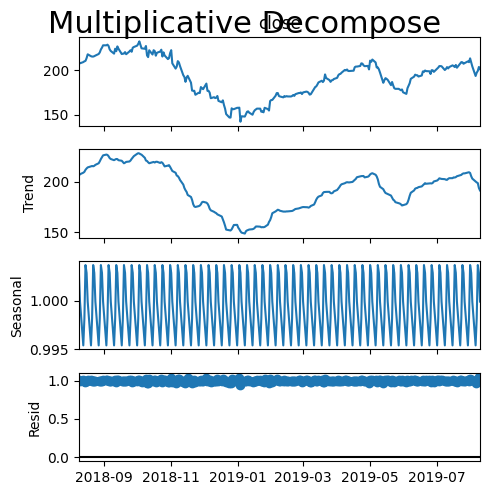

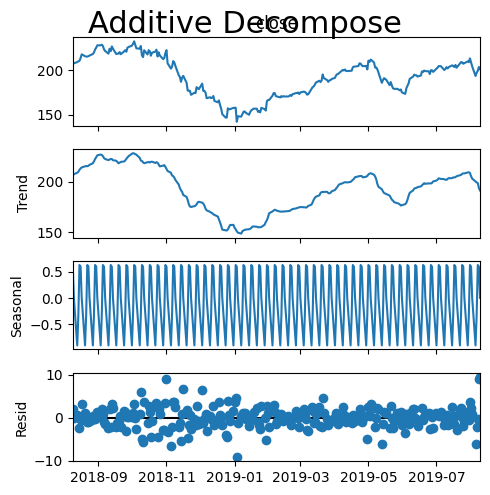

In [37]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition
result_mul = seasonal_decompose(df_new['close'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df_new['close'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (5,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

Note :: Simple method to detect is multiplicative or additive model

Compare the noise / residue of both models

The model which has repeatitions in residue that is wrong model

IN THIS CASE both models are working perfectly so choose any

# Apply regression for Time series Prediction

## Create the features

 how many ? --> you can do trial and error

 here we will consider 5

In [38]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2018-08-09 to 2019-08-09
Freq: B
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   262 non-null    float64
 1   volume  262 non-null    object 
 2   open    262 non-null    float64
 3   high    262 non-null    float64
 4   low     262 non-null    float64
dtypes: float64(4), object(1)
memory usage: 12.3+ KB


In [39]:
ts_data = df_new[['close']].copy()
ts_data.shape

(262, 1)

In [40]:
ts_data['close_t_1'] = ts_data['close'].shift(1) # shift one value below
ts_data['close_t_2'] = ts_data['close'].shift(2) # shift one value below
ts_data['close_t_3'] = ts_data['close'].shift(3) # shift one value below
ts_data['close_t_4'] = ts_data['close'].shift(4) # shift one value below
ts_data['close_t_5'] = ts_data['close'].shift(5) # shift one value below

In [41]:
ts_data.head(7)

,close,close_t_1,close_t_2,close_t_3,close_t_4,close_t_5
date,,,,,,
2018-08-09,208.88,NaN,NaN,NaN,NaN,NaN
2018-08-10,207.53,208.88,NaN,NaN,NaN,NaN
2018-08-13,208.87,207.53,208.88,NaN,NaN,NaN
2018-08-14,209.75,208.87,207.53,208.88,NaN,NaN
2018-08-15,210.24,209.75,208.87,207.53,208.88,NaN
2018-08-16,213.32,210.24,209.75,208.87,207.53,208.88
2018-08-17,217.58,213.32,210.24,209.75,208.87,207.53


In [42]:
ts_data.dropna(inplace=True)

In [43]:
ts_data.head()

,close,close_t_1,close_t_2,close_t_3,close_t_4,close_t_5
date,,,,,,
2018-08-16,213.32,210.24,209.75,208.87,207.53,208.88
2018-08-17,217.58,213.32,210.24,209.75,208.87,207.53
2018-08-20,215.46,217.58,213.32,210.24,209.75,208.87
2018-08-21,215.04,215.46,217.58,213.32,210.24,209.75
2018-08-22,215.05,215.04,215.46,217.58,213.32,210.24


# After creating features its like normal tabular data for regression problem

## X & Y , train test split

In [44]:
Y = ts_data['close']
X = ts_data.drop('close',axis=1)

In [45]:
X.shape, Y.shape

((257, 5), (257,))

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=7)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((179, 5), (78, 5), (179,), (78,))

# Apply regression model

In [47]:
def eval_fun(Y_test,Y_pred):
    from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
    # r2 = r2_score(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    mae = mean_absolute_error(Y_test,Y_pred)
    return mse, mae

In [48]:
# create a RF regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50,max_depth=5, oob_score=True,random_state=7)
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=5, n_estimators=50, oob_score=True,
                      random_state=7)

In [49]:
Y_pred_rf = rf.predict(X_test)

In [50]:
mse, mae = eval_fun(Y_test,Y_pred_rf)
print("mse = ", mse, " mae =", mae)

mse =  17.09644146642519  mae = 3.126545354949534


In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth= 5, n_estimators= 50, subsample= 0.8,random_state=7)
gbr.fit(X_train,Y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=50, random_state=7,
                          subsample=0.8)

In [52]:
Y_pred_gbr = gbr.predict(X_test)

In [53]:
mse, mae = eval_fun(Y_test,Y_pred_gbr)
print( "mse = ", mse, " mae =", mae)

mse =  19.313269145529073  mae = 3.3705146947468676


# Plot the results

In [54]:
res = pd.DataFrame([Y_test.values, Y_pred_rf, Y_pred_gbr]).T
res.columns = ['Y_test', 'Y_pred_rf', 'Y_pred_gbr']
res.shape

(78, 3)

<Axes: >

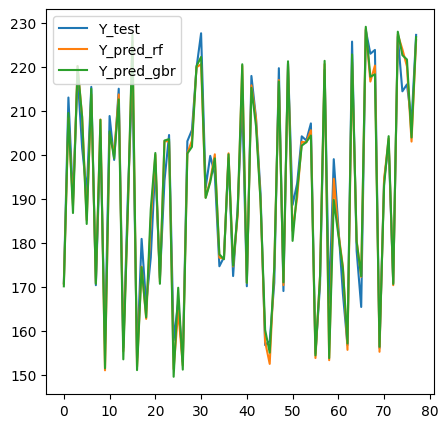

In [55]:
res.plot()

# LSTM

## Imp implementation details for RNN / LSTM

inputs are processed sequentially and not all together

Ex. if there are 5 features X t-1, X t-2, x t-3, x t-4 , x t-5

here , we don't give all 5 features at once

first x t-1 goes then x t-2 .... one by one

So, to achieve this LSTM input need to be in form of a queue / sequence and not as simple array

ex. [1,2,3,4] --> this will not work

[[1], [2], [3], [4]]  --> like this we can access one value at a time

In [56]:
import tensorflow as tf
from tensorflow import keras

In [57]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((179, 5), (78, 5), (179,), (78,))

In [58]:
X_train[:3].values

array([[178.58, 179.55, 180.94, 174.24, 174.62],
       [192.74, 194.15, 194.19, 194.81, 192.58],
       [166.52, 166.44, 165.25, 154.68, 156.3 ]])

In [59]:
# reshape the training features and test features to suit input format of RNN / LSTM
# here we add extra dim to X_train and X_test
import numpy as np
X_train = np.reshape(X_train.values, (X_train.shape[0],X_train.shape[1], 1))

In [60]:
X_train.shape

(179, 5, 1)

In [61]:
X_train[:3]

array([[[178.58],
        [179.55],
        [180.94],
        [174.24],
        [174.62]],

       [[192.74],
        [194.15],
        [194.19],
        [194.81],
        [192.58]],

       [[166.52],
        [166.44],
        [165.25],
        [154.68],
        [156.3 ]]])

## LSTM with single neuron

Lets check power of a single neuron of LSTM

In [62]:
model = keras.Sequential()

# Adding LSTM layers
model.add(keras.layers.LSTM(units=1,return_sequences = False,
                            input_shape= (X_train.shape[1],X_train.shape[2])))
# Adding the output layer
model.add( keras.layers.Dense(1, activation='linear'))

# Compiling the LSTM
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 12        
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.1,
                    epochs = 100, batch_size = 5)

Epoch 1/100
33/33 [==============================] - 11s 106ms/step - loss: 37704.2969 - val_loss: 35431.3828
Epoch 2/100
33/33 [==============================] - 0s 8ms/step - loss: 37691.5664 - val_loss: 35419.0430
Epoch 3/100
33/33 [==============================] - 0s 11ms/step - loss: 37678.8594 - val_loss: 35406.7227
Epoch 4/100
33/33 [==============================] - 0s 9ms/step - loss: 37666.1445 - val_loss: 35394.4180
Epoch 5/100
33/33 [==============================] - 0s 6ms/step - loss: 37653.4336 - val_loss: 35382.1484
Epoch 6/100
33/33 [==============================] - 0s 5ms/step - loss: 37640.7109 - val_loss: 35369.7891
Epoch 7/100
33/33 [==============================] - 0s 6ms/step - loss: 37627.9805 - val_loss: 35357.5352
Epoch 8/100
33/33 [==============================] - 0s 5ms/step - loss: 37615.3164 - val_loss: 35345.2188
Epoch 9/100
33/33 [==============================] - 0s 5ms/step - loss: 37602.6133 - val_loss: 35332.9453
Epoch 10/100
33/33 [=============

In [ ]:
# history = model.fit(X_train, Y_train, validation_split=0.3,epochs = 10, batch_size = 10)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Multi layer LSTM

HL 1 --> 10 LSTM neurons

HL 2 --> 5

Output Layer --> dense layer 1 neuron activation => linear

In [ ]:
model = keras.Sequential()

# Adding LSTM layers
model.add(keras.layers.LSTM(units=10,return_sequences = True,
                            input_shape= (X_train.shape[1],X_train.shape[2])))

model.add(keras.layers.LSTM(units=5,return_sequences = False))
# Adding the output layer
model.add( keras.layers.Dense(1, activation='linear'))

# Compiling the LSTM
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.3,epochs = 100, batch_size = 10)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])